<a href="https://colab.research.google.com/github/Drashti-Naik/colab-python/blob/main/C115%2C116%2C117_logistic_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Class C115 - Logistic Regression

###**Goal**

● Learn about using sigmoid functions on data which has binary
values

\
Today, we have some data of 1000 students that applied to a university. We know the scores of these students, and we also know if they were accepted to the university or not.

\
Can we build a model where we can predict if a student will get admitted based on their marks? Let's try!

C115: https://obj.whitehatjr.com/749ea77c-3978-4195-8ffd-e27b99529cc3.pdf

### CHALLENGE
● Learn the usage of sigmoid function in linear regression

● plot a graph using sigmoid function

● Write a prediction algorithm

#Logistic Regression

Logistic Regression is used when the dependent variable(target) is categorical.

For example,
* To predict whether an email is spam (1) or (0)
* Whether the tumor is malignant (1) or not (0)

Consider a scenario where we need to classify whether an email is spam or not. If we use linear regression for this problem, there is a need for setting up a threshold based on which classification can be done. Say if the actual class is malignant, predicted continuous value 0.4 and the threshold value is 0.5, the data point will be classified as not malignant which can lead to serious consequence in real time.

From this example, it can be inferred that linear regression is not suitable for classification problem. Linear regression is unbounded, and this brings logistic regression into picture. Their value strictly ranges from 0 to 1.

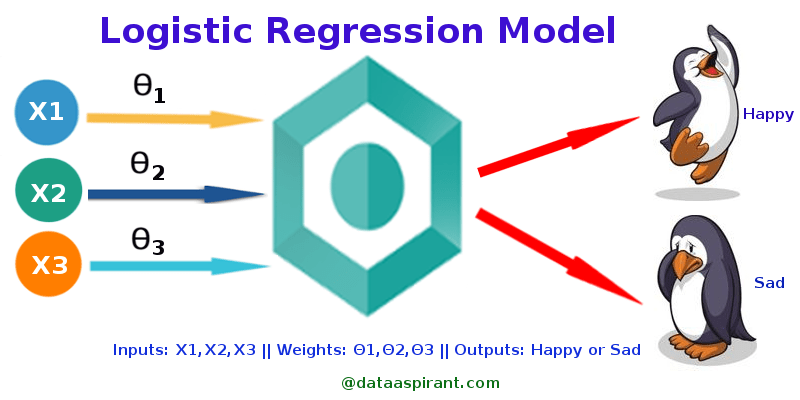

Here, we have loaded the data. Let's see how the data looks like in a scatter plot -

So here we have data of 1000
students that applied to a university.
We know the scores of these
students, and we also know if they
were accepted to the university or not.
So let's try to build a model which will
predict if the student will get enrolled
or not based on the marks obtained
by him/her.

In [ ]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("https://raw.githubusercontent.com/whitehatjr/datasets/master/PRO-C115/data.csv")

df

,Score,Accepted
0,39.6,0
1,46.3,0
2,28.4,0
3,46.4,0
4,32.4,0
...,...,...
995,68.0,0
996,52.5,0
997,34.3,0
998,23.2,0


In [ ]:
df.Accepted.value_counts()

0    839
1    161
Name: Accepted, dtype: int64

In [ ]:
score_list = df["Score"].tolist()
accepted_list = df["Accepted"].tolist()

fig = px.scatter(x=score_list, y=accepted_list)
fig.show()

**What do you see?**


What do you think the line of
regression (best fit line) looks like?

Using the following formula -



```
y = mx + c
```

Let's try to find out the line of regression in this plot.

In [ ]:
import numpy as np
score_array = np.array(score_list)
accepted_array = np.array(accepted_list)

#Slope and intercept using pre-built function of Numpy
m, c = np.polyfit(score_array, accepted_array, 1)

y = []
for x in score_array:
  y_value = m*x + c
  y.append(y_value)

#plotting the graph
fig = px.scatter(x=score_array, y=accepted_array)
fig.update_layout(shapes=[
    dict(
      type= 'line',
      y0= min(y), y1= max(y),
      x0= min(score_array), x1= max(score_array)
    )
])
fig.show()

If we look at this line, does it make sense?

\
Of course not. This graph deserves a curvy line. We can see that students up to the score of 82.7 were not accepted.

\
Yes! And at times like this when we
have a little vague data we use
sigmoid function to represent the
graph in an understandable way.
The reason we choose a sigmoid
function to model classification
problems solved with logistic
regression is that we want to make
sure that predicted value has a
defined range which aids us in
differentiating the classes. This has
proved to be very useful in binary
classification problems.

\

This graph can be better represented by the sigmoid function, which looks like this.

\
\
![alt text](https://www.researchgate.net/profile/Knut_Kvaal/publication/239269767/figure/fig2/AS:643520205430784@1530438581076/An-illustration-of-the-signal-processing-in-a-sigmoid-function.png)

\


The logistic sigmoid function is
defined as $(1/(1 + e^-x))$ and it takes
an input x of any real number and
returns an output value in the range of
-1 and 1.


As we see here the X in the image is
the value of $mx+c$.


Let's plot the graph using the sigmoid
function.
Here we'll use hit and trial on the
X_test to find the value which will lie
on the line at the intersection.

In [ ]:
# first we import pyplot and logisticRegression
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Then we reshape the array using the reshape function from a 3 by 3 matrix to a single array
X = np.reshape(score_list, (len(score_list), 1))
Y = np.reshape(accepted_list, (len(accepted_list), 1))
#print(X)
#print(Y)

* np.reshape = reshapes the arrays
without changing the data. It changes
the shape and size of the array.
* np.linspace =returns evenly spaced
numbers over a specified interval.
* axhline stands for axis horizontal line.
* ravel() is used to convert 2 arrays into
one.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



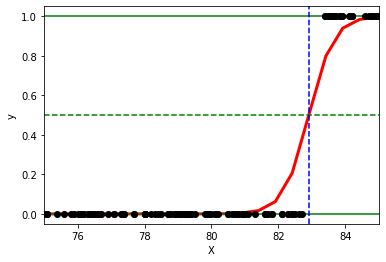

In [ ]:
#Use logisticRegression model to fit the data into the model so that it can make predictions with maximum accuracy
lr = LogisticRegression()
lr.fit(X, Y)

#creating a scatter plot
plt.figure()
plt.scatter(X.ravel(), Y, color='black', zorder=20)

#defining the sigmoid function to predict the probability as ouput
def model(x):
  return 1 / (1 + np.exp(-x))

##Using the line space function to evenly space the dots and using ravel function to create a single array
X_test = np.linspace(0, 100, 200) #Return evenly spaced numbers over a specified interval.
chances = model(X_test * lr.coef_ + lr.intercept_).ravel() # ravel, which is used to change a 2-dimensional array or a multi-dimensional array into a contiguous flattened array

#Plotting the plot with different colors. axhline stands for axis horizontal line
plt.plot(X_test, chances, color='red', linewidth=3)
plt.axhline(y=0, color='green', linestyle='-')
plt.axhline(y=1, color='green', linestyle='-')
plt.axhline(y=0.5, color='green', linestyle='--')

# do hit and trial by changing the value of X_test
plt.axvline(x=X_test[165], color='b', linestyle='--')

plt.ylabel('y')
plt.xlabel('X')
plt.xlim(75, 85)
plt.show()

In [ ]:
lr.coef_

array([[2.70984574]])

In [ ]:
lr.intercept_

array([-224.6674072])

Now we have got our values of slope
and intercept.
We'll write a small code where we'll
give the marks scored by the student
as input and it will tell us the chances
of the student being accepted by the
college.


In [ ]:
user_score = float(input("Enter your marks here:- "))
chances = model(user_score * lr.coef_ + lr.intercept_).ravel()[0]
if chances <= 0.01:
  print("The student will not get accepted")
elif chances >= 1:
  print("The student will get accepted!")
elif chances < 0.5:
  print("The student might not get accepted")
else:
  print("The student may get accepted")

Enter your marks here:- 96
The student may get accepted


In [ ]:
chances

0.9999999999999996

Alright! So this is how data scientists
do predictions using the previous data
to arrive at the necessary conclusions
for effective planning where the data
has one constantly changing variable
and one variable which has binary values (0 and 1) 0 means No and 1
means Yes



---



---



C117 confusion_matrix : https://colab.research.google.com/drive/1G0CrZaSoyOrC9Utsiy_i8XPuSY8sqc-2